### Network graph 
https://plotly.com/python/network-graphs/

### Sankey diagrams
https://borealperspectives.org/2013/11/10/sankey-diagrams-bad-charts-and-science-careers/
http://bl.ocks.org/drarnakarick/967acc51cc5e7842fd7c4dc67f21f859

### Other metrics
- Altmetrics
- ???

### scholarly API
- pip install scholarly

In [1]:
# read csv file
import pandas as pd
pd.options.plotting.backend = "plotly"

articles_zenodo = pd.read_excel('RyC_articles.xlsx',sheet_name=1)
articles_zenodo.head()

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,Y7THFE63,journalArticle,2019,"Mary, Benjamin; Vanella, Daniela; Consoli, Sim...",Assessing the extent of citrus trees root appa...,Scientific Reports,NaN,2045-2322,10.1038/s41598-019-46107-w,http://www.nature.com/articles/s41598-019-46107-w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFTZCWGH,journalArticle,2015,"Vennetier, Michel; Zanetti, Caroline; Meriaux,...",Tree root architecture: new insights from a co...,Plant and Soil,NaN,"0032-079X, 1573-5036",10.1007/s11104-014-2272-9,http://link.springer.com/10.1007/s11104-014-22...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3I9JB8BR,journalArticle,2020,Benjamin Mary; Guillaume Blanchy,CAGS: Catalog of Agrogeophysical Studies,NaN,NaN,NaN,NaN,https://zenodo.org/record/4058524#.X_c10OhKg2w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9GLKV28K,journalArticle,2020,"Mary, Benjamin; Peruzzo, Luca; Boaga, Jacopo; ...",Time-lapse monitoring of root water uptake usi...,SOIL,NaN,2199-3971,https://doi.org/10.5194/soil-6-95-2020,https://soil.copernicus.org/articles/6/95/2020/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V83BNVM8,journalArticle,2020,"Peruzzo, Luca; Chou, Chunwei; Wu, Yuxin; Schmu...",Imaging of plant current pathways for non-inva...,Plant and Soil,NaN,"0032-079X, 1573-5036",10.1007/s11104-020-04529-w,http://link.springer.com/10.1007/s11104-020-04...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
#from rpy2.robjects.packages import importr
from scholarly import scholarly

# Retrieve the author's data, fill-in, and print
# Get an iterator for the author results
search_query = scholarly.search_author('Benjamin Mary, Padova')
# Retrieve the first result from the iterator
first_author_result = next(search_query)
scholarly.pprint(first_author_result)

# Retrieve all the details for the author
author = scholarly.fill(first_author_result )
#scholarly.pprint(author)


first_author_result

citedby

{'affiliation': 'University of Padua, Department of Geosciences - Visiting '
                'Scholar at Berkeley Lab',
 'citedby': 159,
 'email_domain': '@unipd.it',
 'filled': False,
 'interests': ['Applied geophysics'],
 'name': 'Benjamin Mary',
 'scholar_id': '3kDP4-AAAAAJ',
 'source': 'SEARCH_AUTHOR_SNIPPETS',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=3kDP4-AAAAAJ'}


__enter__
Fetching only the top 20 coauthors


NameError: name 'citedby' is not defined

In [55]:
import matplotlib as mpl
pd.options.plotting.backend = "matplotlib"
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

,0
2015,4
2016,3
2017,13
2018,3
2019,24
2020,39
2021,55
2022,7


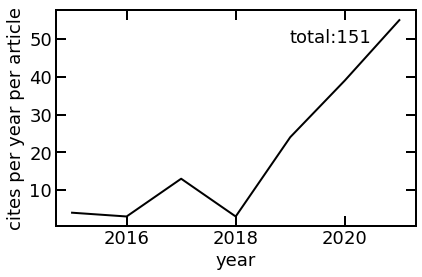

In [75]:
pd_citations = pd.DataFrame(author['cites_per_year'], index=[0])
pd_cit_t = pd_citations.transpose()




fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
pd_cit_t[:-1].plot(ax=ax,linewidth=2, color='k',legend=None)
ax.set_xlabel('year')
ax.set_ylabel('cites per year')
plt.annotate('total:' + str(author['citedby']), xy=(0.65, 0.85), xycoords='axes fraction')



ax.set_ylabel('cites per year per article')

pd_cit_t


In [93]:
publications = author['publications']

pub_year = []
for key in publications:   
    try:
        print(key['bib']['pub_year'])
        pub_year.append(int(key['bib']['pub_year']))
    except:
        pass

pub_year

2018
2019
2016
2015
2017
2020
2020
2015
2015
2021
2019
2021
2021
2021
2021
2020
2019
2019
2019
2018
2018
2018
2017
2017
2015
2014
2013
2013


[2018,
 2019,
 2016,
 2015,
 2017,
 2020,
 2020,
 2015,
 2015,
 2021,
 2019,
 2021,
 2021,
 2021,
 2021,
 2020,
 2019,
 2019,
 2019,
 2018,
 2018,
 2018,
 2017,
 2017,
 2015,
 2014,
 2013,
 2013]

In [4]:
# Take a closer look at the first publication
first_publication = author['publications'][0]
first_publication_filled = scholarly.fill(first_publication)
#scholarly.pprint(first_publication_filled)



In [5]:
# Print the titles of the author's publications
#publication_titles = [pub['bib']['title'] for pub in author['publications']]
#print(publication_titles)



In [6]:
# Which papers cited that publication?
#citations = [citation['bib']['title'] for citation in scholarly.citedby(first_publication_filled)]
#print(citations)


In [7]:
field_activity.sort_values(by='Publication Year', ascending=True, inplace=True)
field_activity

nb_publi_year = field_activity['Publication Year'].value_counts()

field_activity.groupby('Item Type')

mean_impact_factor = []
nb_of_citations = []
nb_of_citations_year = []

# period of 2020/2021
# ------------------
Soil_IF = 3.3
PS_IF = 3.299 
VZJ_IF = 3.289
SciRep_IF = 4.379



NameError: name 'field_activity' is not defined

In [ ]:

field_activity['Nb_year'] = nb_publi_year

field_activity



fig = nb_publi_year.sort_index().plot(x="Year", y="Nb",legend=[], color="species",
                title="Automatic Labels Based on Data Frame Column Names")
fig.show()


nb_publi_year


In [ ]:
from rpy2.robjects.packages import importr
utils = importr('scholar')

